In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator

#set Style
sns.set(style='whitegrid')


#step by step plan
step 1: load and inspect the dataset
step 2: Clean and preprocess the data
step 3: Analyze funding trends overtime
step 4: identify top funded sectors,cities,startups
step 5: Analyze investors baheviour
step 6: Analyze investments types and stages
step 7: correlation analysis
step 8: identify funding outliers and growth trends
step 9: Advanced analysis(funding stage,investor types etc)

#step 1: load and inspect the dataset
objective:Understand the structure and initial data quality

In [4]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)
  return file
filepath="/content/drive/MyDrive/KLENIPANI2"
filename="startup_funding138 (1).xlsx"
df=readcsv(filepath,filename)


In [5]:
print(pd.DataFrame(df.head(5)))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2 

In [6]:
# Inspect first few rows
print("First 5 Rows:")
print(df.head())

#Basic info
print("\nDataset Info:")
print(df.info())

#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

#step 2: Clean and preprocess the data
Objective:Prepare the dataset dor analysis by handling missing values,standardizing,and normalizing functions
Explanation:


*   columns  are cleaned and standardzied
*   Misssing values are filled with apporpriate
*   Date column is converted to datetime and used to extract year and month
*   funding amounts are  normalized to INR using a custom function
*   missing funding values are filled with median to avoid distortion





In [7]:
df.columns


Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [8]:
# Fill missing values
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['Sub_Vertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed')

In [9]:
# Convert date column to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [10]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks', 'Sub_Vertical', 'Year', 'Month'],
      dtype='object')

In [11]:
# apply the functions to the Amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [12]:
#Save cleaned data
df.to_csv('cleaned_startup_funding.csv', index=False)

#Step 3:Funding Trends Over Time

Objective :Analyze how funding has envolved year-over-year and month-over-month.
Explanation:

*   A countplot shows the number of funding deals over the years
*   A line plot shows total funding amount per year,helping identify growth or decline trends



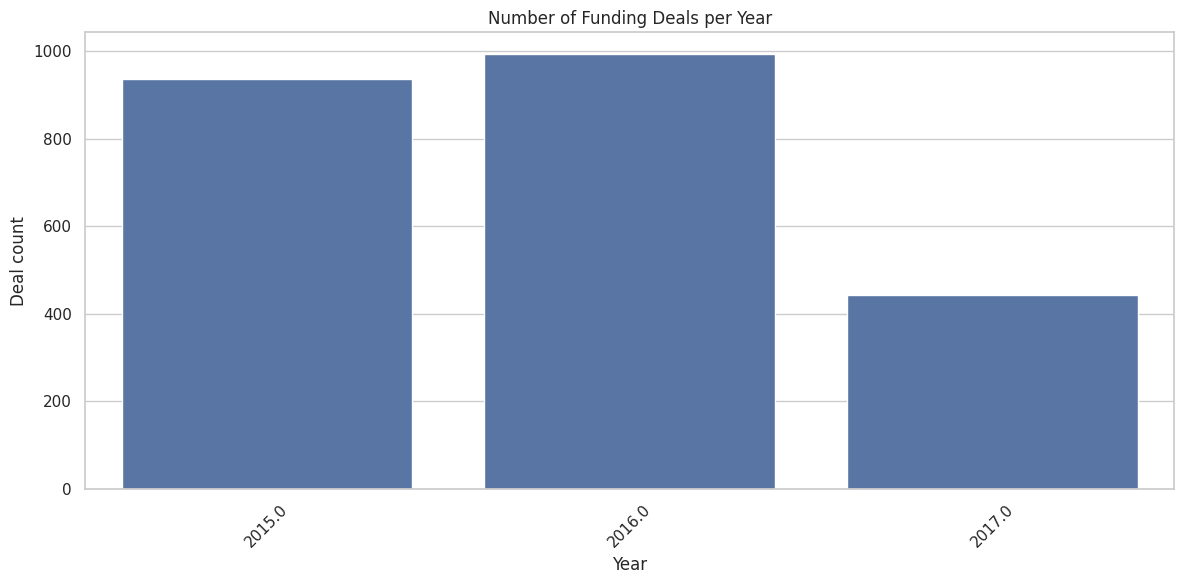

In [13]:
#number of deals per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.title("Number of Funding Deals per Year")
plt.xlabel("Year")
plt.ylabel("Deal count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

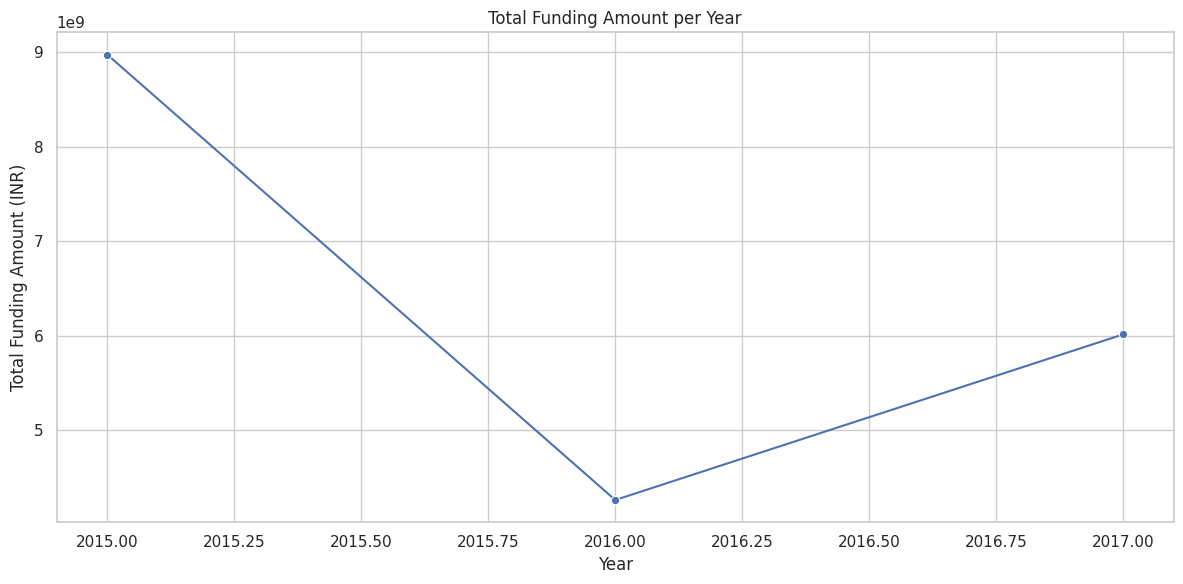

In [14]:
#Total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.title("Total Funding Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total Funding Amount (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Step 4: Top Funded Sectors,cities and startups.
objective:identify the most funded sectors,cities,and startups.
explanation:


*   Bar chart show which sectors,cities,and startups are receving the most attention and funding




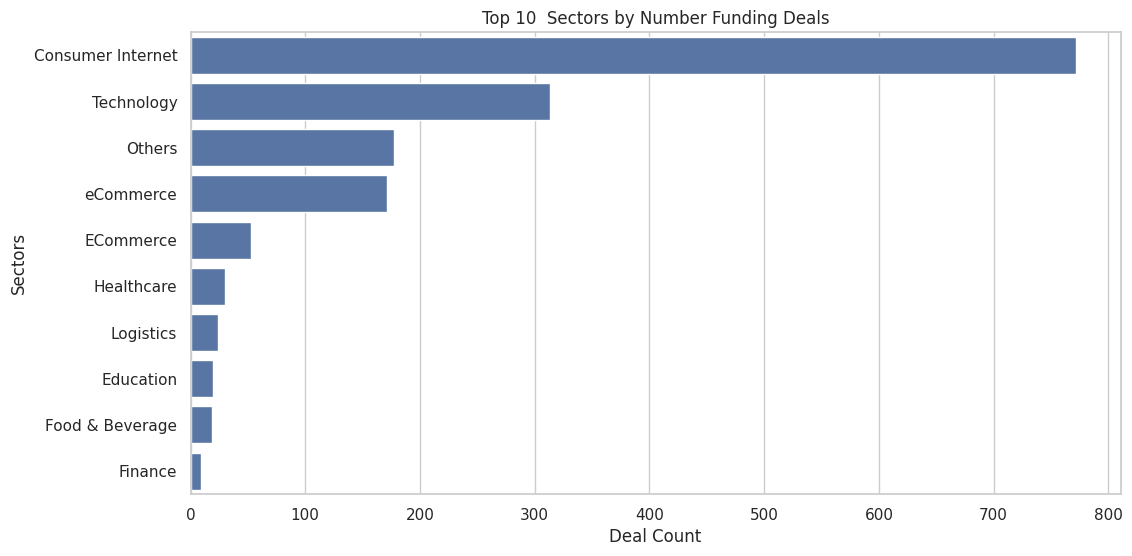

In [15]:
#Top Sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10  Sectors by Number Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sectors")
plt.show()

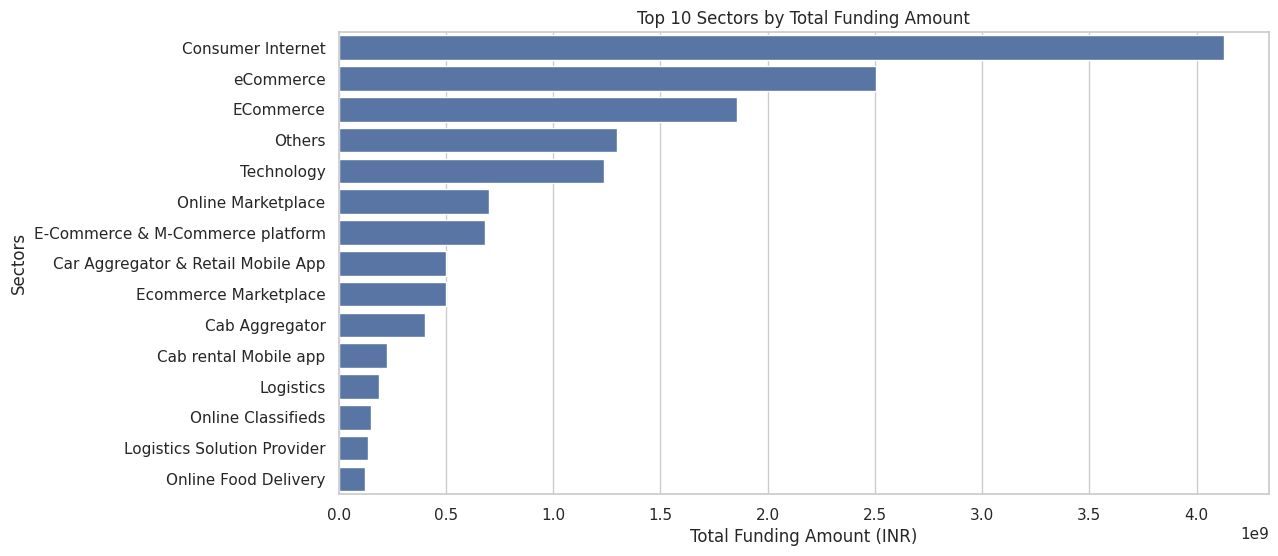

In [16]:
#Top sectors by total Funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'E-Commerce': 'E-commerce'})
sector_funding= df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Sectors by Total Funding Amount")
plt.xlabel("Total Funding Amount (INR)")
plt.ylabel("Sectors")
plt.show()

# Step 5:step 5: Analyze investors baheviour
objectives: understand which investors are most active and which sectors they invest in.
Explanation:


*   Investors are split into individual names
*   Top investors are identified by number of deals and total funding



In [17]:
#Split multiple investors and count
investors_df =df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

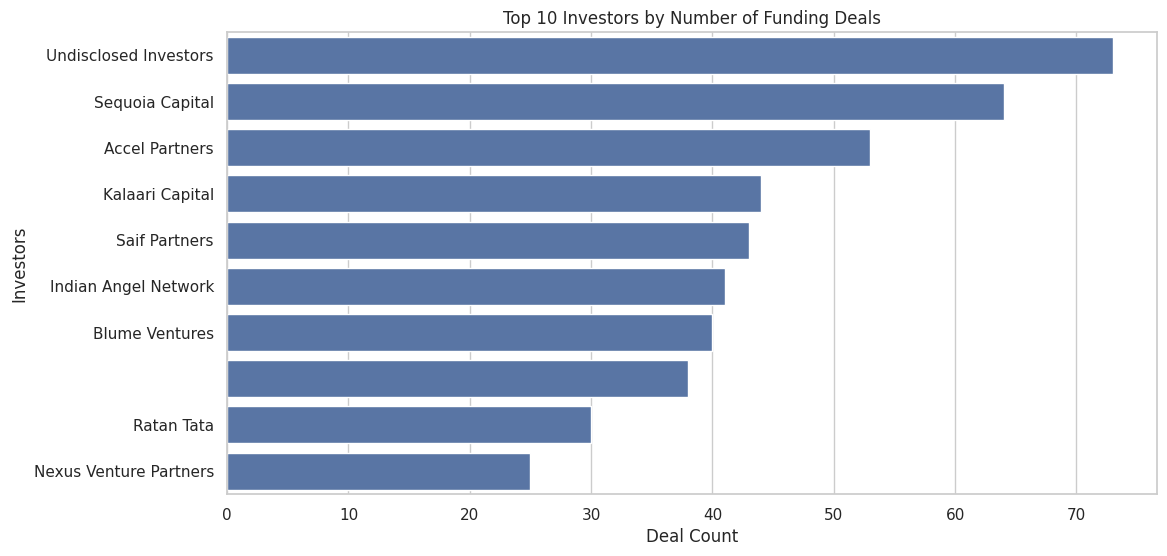

In [18]:
# Top investors by number of deals
top_investors = investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_investors.values, y=top_investors.index)
plt.title("Top 10 Investors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Investors")
plt.show()

# Step 6:Investment Type Analysis
Objective:Understand the types of investment (seed,seiesA,etc)
Explanation:


*   This helps identify the stage of startups receving the most funding




In [19]:
df.columns


Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks', 'Sub_Vertical', 'Year', 'Month'],
      dtype='object')

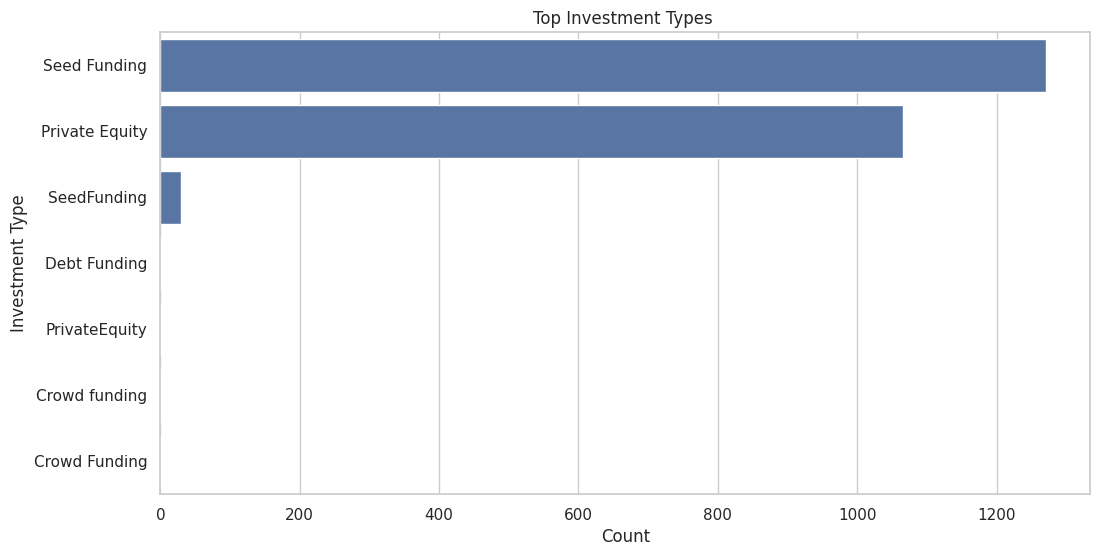

In [20]:
investmennt_type = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=investmennt_type.values, y=investmennt_type.index)
plt.title("Top Investment Types ")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()

#Step 7:Correlation Between sector and Investment Types
Objective:See which sectors atract which types of funding
Explanation:



*   A heatmap shows which sectors are dominated by which investment type




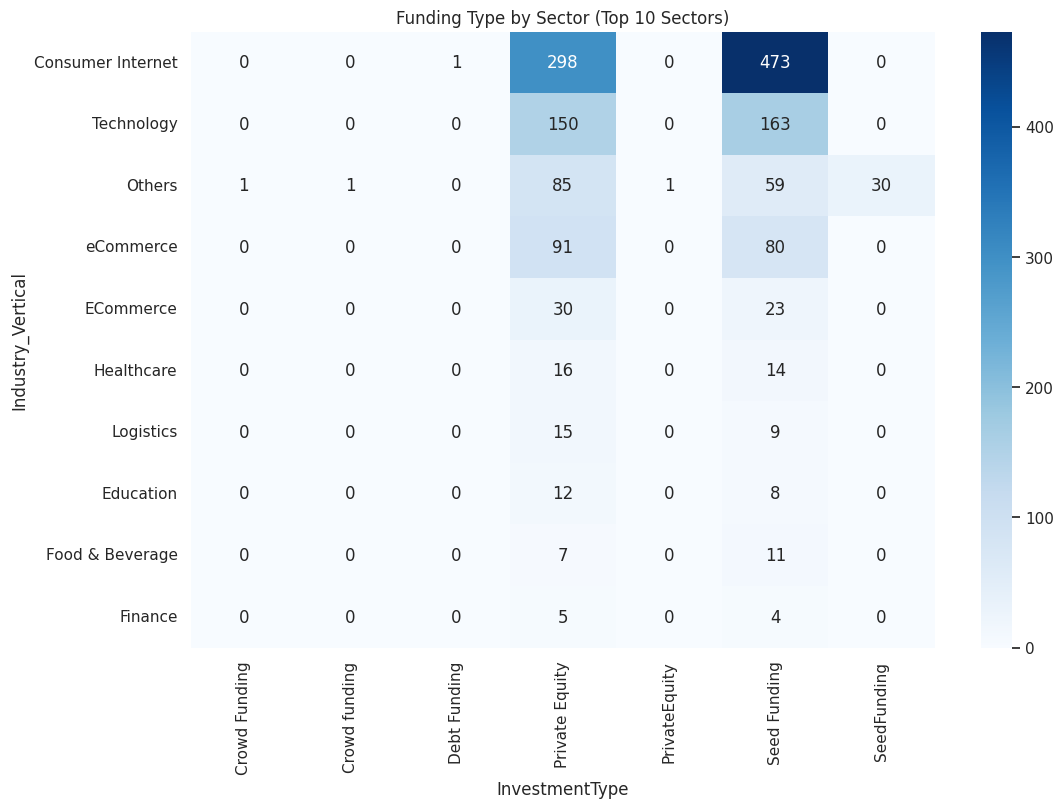

In [21]:
sector_stage=pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage=sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12, 8))
sns.heatmap(sector_stage,annot=True,fmt="d",cmap="Blues")
plt.title("Funding Type by Sector (Top 10 Sectors)")
plt.show()

# Step 8:Funding Distribution and outliers
Objective:Understand how funding is distributed and identify outliers.
Explanation:


*   Histogram and boxplot help understand skewness and identify outliers like paytm or flipkart





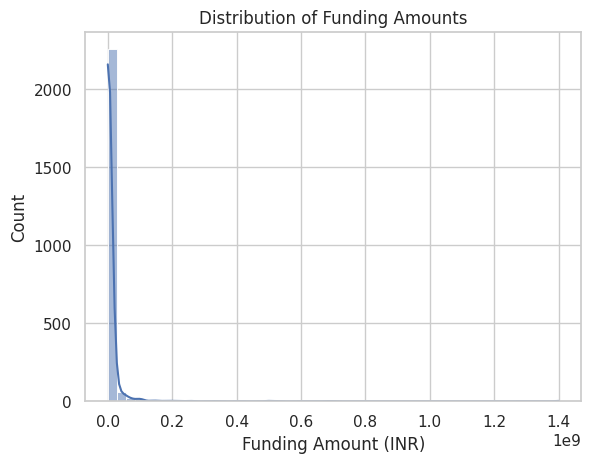

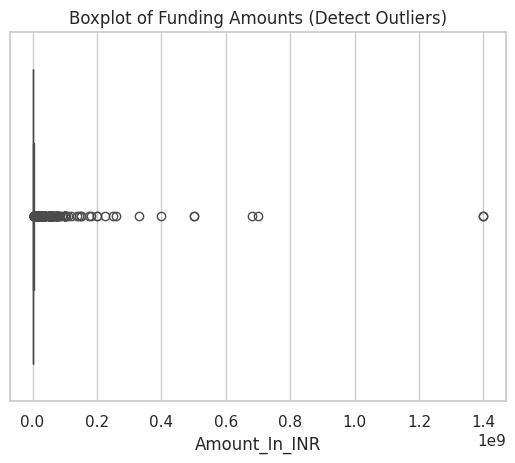

In [22]:
sns.histplot(df['Amount_In_INR'],bins=50, kde=True)
plt.title("Distribution of Funding Amounts")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amounts (Detect Outliers)")
plt.show()

#Step 9:Growth Trend
Objective:Identify sectors with the heighset growth potential
Explanation:

*   Helps identify emerging sectors that may offer future opportunities.




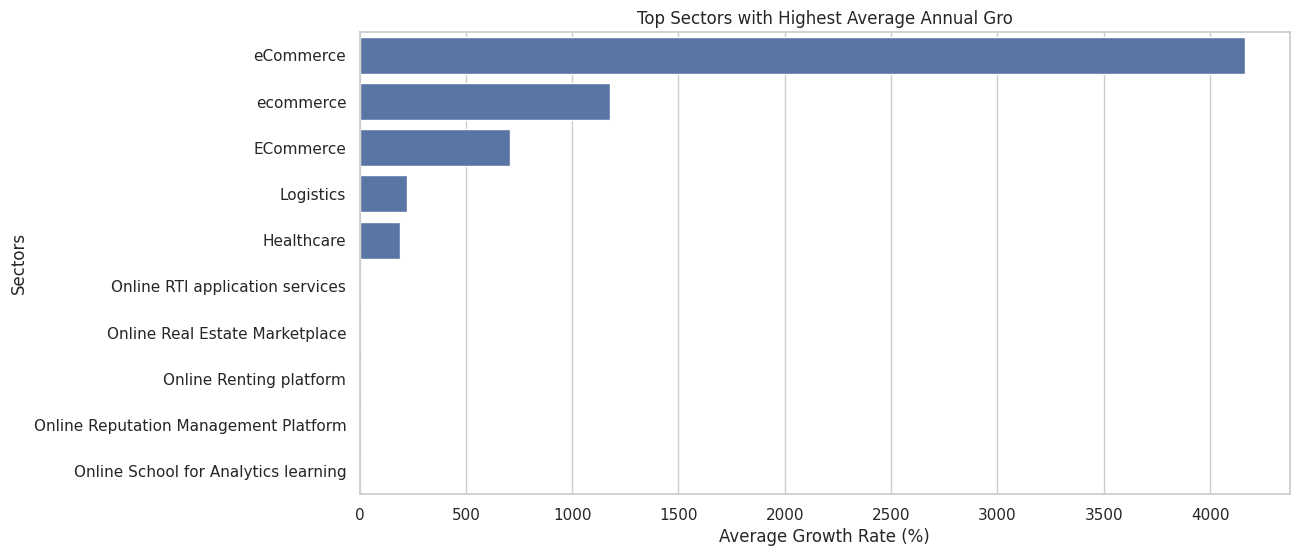

In [23]:
sector_yearly=df.groupby(['Year','Industry_Vertical'])['Amount_In_INR'].sum().unstack()
sector_growth=sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_growth.values *100,y=sector_growth.index)
plt.title("Top Sectors with Highest Average Annual Gro")
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Sectors")
plt.show()


In [24]:
sector_yearly

Industry_Vertical,360-degree view creating platform,3D Printer Manufacturer,API Workflow platform,Activity Based Social Network,Advertising & Marketing Community Networking platform,Affordable Education,Affordable Hotel Booking Online,Algorithmic Match Making Platform,Alternate Mobile Monetization platform,App Analytics platform,...,online recipe sharing platform,online tiffin service aggregator,pre-owned Luxury online apparel seller,pre-used apparel shopping mobile app,pre-used luxury item Marketplace,proximity marketing & Mobile Advertising platform,residential rental management platform,solar products and services marketplace,"virtual reality, 3d simulation and stereoscopic products",visual search and discovery platform
Year,,,,,,,,,,,,,,,,,,,,,
2015.0,1070000.0,3000000.0,1000000.0,1070000.0,1000000.0,650000.0,5000000.0,1070000.0,5000000.0,500000.0,...,1070000.0,1070000.0,1070000.0,1000000.0,1070000.0,80000.0,640000.0,1070000.0,800000.0,1000000.0
2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 10:Advance Analysis
Goal:


*  Investor type distribution
*  Startup funding trajectory


1.   Investor type Distribution.

     goal:Classify investors into types like VC,Angel,Corporate,etc.

     Explanation : Investors are split into individual names.
      
      Investors Names are Classified using keyword matching.

      A bar Chart shows the number of deals per investor type.







In [25]:
investor_df=df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investor_df['Investors_Name']=investor_df['Investors_Name'].str.split(',')
investor_df=investor_df.explode('Investors_Name').dropna()
investor_df['Investors_Name']=investor_df['Investors_Name'].str.strip().str.title()

In [26]:
def classify_investor(investor_name):
  name = investor_name.lower()
  if any(word in name for word in ['capital','ventures','partners','fund','vc','labs']):
    return 'VC'
  elif any(word in name for word in['angel','network']):
    return 'Angel'
  elif any(word in name for word in['crop','limited','pvt','ltd','inc']):
    return 'Corporate'
  else:
    return 'Other'

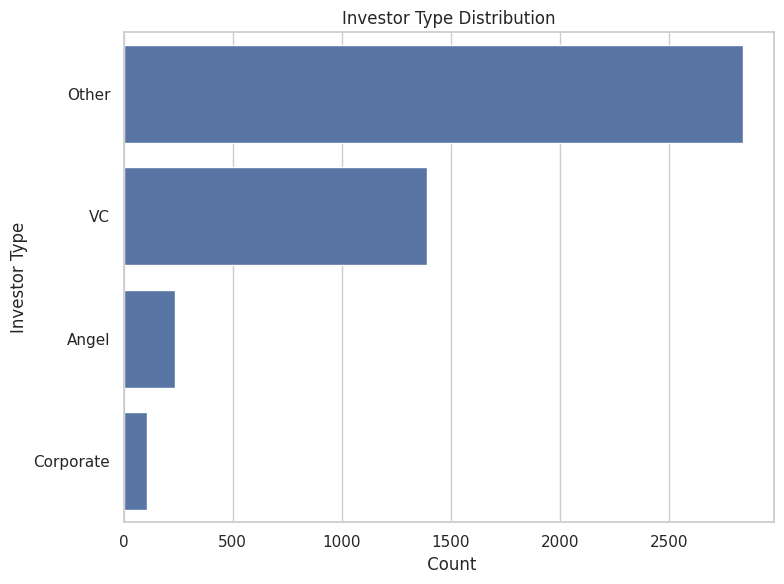

In [27]:
investors_df['Investors_Type']=investors_df['Investors_Name'].apply(classify_investor)
investors_type_counts=investors_df['Investors_Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=investors_type_counts.values, y=investors_type_counts.index)
plt.title("Investor Type Distribution")
plt.xlabel(" Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()

#2.Startup Funding Trajectory
Goal:Track how top startups grew in terms of funding over time.

Explanation:


*   startups are grouped by name and year
*   Cumulative funding is calculated
*   A line plot shows the funding growth of top 5 startups over time.



In [28]:
#Group by startup and year ,then compute cumulative funding
startup_funding=df.groupby(['StartupName','Year'])['Amount_In_INR'].sum().unstack()

# Select top 5 funded startups
top_startups=startup_funding.sum(axis=1).sort_values(ascending=False).head(5).index

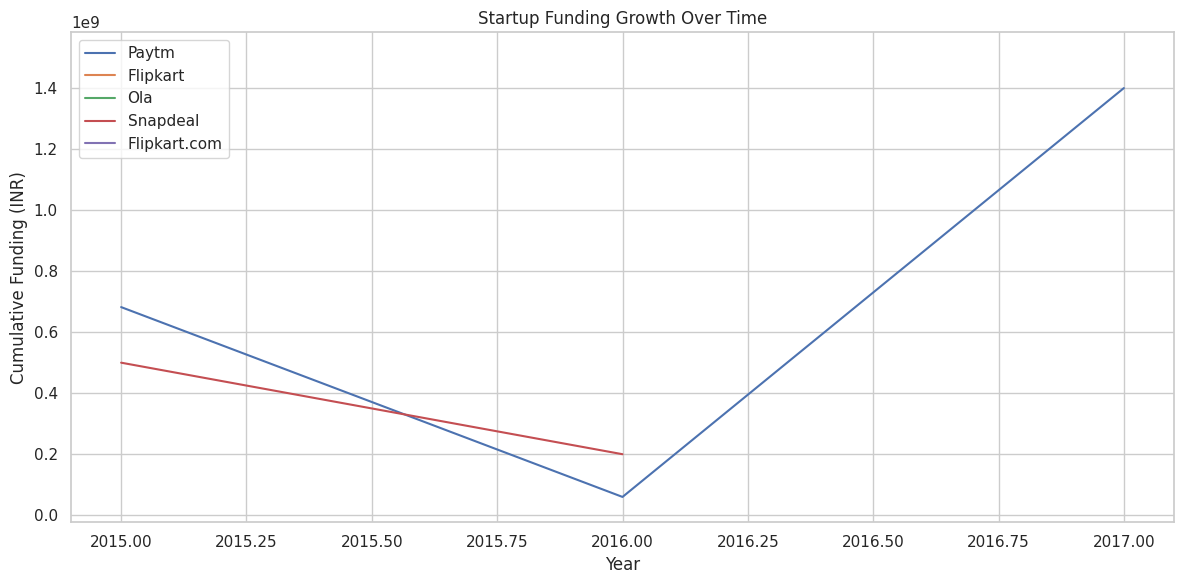

In [29]:
plt.figure(figsize=(12, 6))
for startup in top_startups:
  plt.plot(startup_funding.loc[startup].index,startup_funding.loc[startup].values,label=startup)

plt.title("Startup Funding Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Cumulative Funding (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()